In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# criterion=nn.BCELoss()
# x=torch.rand(128,1)
# y=torch.rand(128,1)
# criterion(x,y)

In [3]:
class cat_data:
    def __init__(self):
        data = np.load('full_numpy_bitmap_grapes.npy')
        data=data/255
        data=data.reshape(data.shape[0],1,28,28)
        self.data=torch.from_numpy(data.astype(np.float32))
        self.samples=data.shape[0]
    def __getitem__(self,index):
        return self.data[index],torch.tensor([0],dtype=torch.float32)
    def __len__(self):
        return self.samples

In [4]:
batch_size = 64
data=cat_data()
dataloader=torch.utils.data.DataLoader(dataset=data,batch_size=batch_size,shuffle=True)
x,y=iter(dataloader).next()
x.shape

torch.Size([64, 1, 28, 28])

In [5]:
# class discriminator(nn.Module):
#     def __init__(self):
# #         conv=nn.Conv2d()
#         super(discriminator,self).__init__()
#         self.cnn_layers = nn.Sequential(
#             nn.Conv2d(1, 32, 3, 2, 1), #32*14*14
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
            
# #             nn.Dropout2d(p=0.2),
#             nn.Conv2d(32, 64, 3, 1, 1), #64*14*14
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
            
# #             nn.Dropout2d(p=0.2),
#             nn.Conv2d(64, 128, 3, 2, 1), #128*7*7
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
            
#             nn.Conv2d(128, 128, 3, 2, 1), 
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
            
#             nn.Conv2d(128, 64, 3, 2,1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
            
#         )
#         self.lin = nn.Linear(2*2*64,1)
        
#     def forward(self,x):
#         pred=self.cnn_layers(x);
#         pred=pred.reshape(pred.shape[0],-1)
#         pred=torch.sigmoid(self.lin(pred))
#         return pred

In [6]:
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [7]:
# model=discriminator()

# model(x).shape

In [8]:
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [9]:
# class CBR(nn.Sequential):
#     def __init__(self, in_planes, out_planes, kernel_size=3, stride=1, groups=1):
#         padding = (kernel_size - 1) // 2
#         norm_layer = nn.BatchNorm2d
#         super(CBR, self).__init__(
#             nn.Conv2d(in_planes, out_planes, kernel_size, stride, padding, groups=groups, bias=False),
#             norm_layer(out_planes),
#             nn.ReLU(inplace=True),
#         )
# class CBLR(nn.Sequential):
#     def __init__(self, in_planes, out_planes, kernel_size=3, stride=1, groups=1):
#         padding = (kernel_size - 1) // 2
#         norm_layer = nn.BatchNorm2d
#         super(CBLR, self).__init__(
#             nn.Conv2d(in_planes, out_planes, kernel_size, stride, padding, groups=groups, bias=False),
#             norm_layer(out_planes),
#             nn.ReLU(inplace=True),
#         )
# class TCBR(nn.Sequential):
#     def __init__(self, in_planes, out_planes, kernel_size=4, stride=2, padding=1):
#         padding = (kernel_size - 1) // 2
#         norm_layer = nn.BatchNorm2d
#         super(TCBR, self).__init__(
#             nn.ConvTranspose2d(in_planes, out_planes, kernel_size, stride, padding, bias=False),
#             norm_layer(out_planes),
#             nn.ReLU(inplace=True),
#         )              

In [10]:
# class generator(nn.Module):
#     def __init__(self, latents):
#         super(generator, self).__init__()
        
#         self.layer1= nn.Sequential(
#             # input is random_Z,  state size. latents x 1 x 1 
#             # going into a convolution
#             TCBR(latents, 256, 4, 2, 1),  # state size. 256 x 2 x 2
#             CBR(256, 128, 3, 1)
#         )
        
#         self.layer2= nn.Sequential(
#             TCBR(128, 256, 4, 1, 0), # state size. 256 x 3 x 3
#             TCBR(256, 256, 4, 2, 1), # state size. 256 x 6 x 6
            
#         )
#         self.layer3= nn.Sequential(
#             TCBR(256, 128, 4, 1, 0), # state size. 256 x 7 x 7
#             TCBR(128, 128, 4, 2, 1),  # state size. 256 x 14 x 14
#             CBR(128, 128, 3, 1)
#             # state size. 256 x 6 x 6

#         )
#         self.layer4= nn.Sequential(
#             TCBR(128, 64, 4, 2, 1), # state size. 64 x 28 x 28
#             CBR(64, 64, 3, 1),
#             CBR(64, 64, 3, 1),
#             nn.Conv2d(64, 1, 3, 1, 1), # state size. 1 x 28 x 28
#             nn.Tanh()
#         )
        
#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.layer4(x)
#         return x

In [11]:
lr_g, lr_d =0.0003, 0.0003
epochs = 10

n_step = len(dataloader)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
################
model_g=generator().to(device)
model_d=discriminator().to(device)
# model_d.train()
# model_g.train()
criterion=nn.BCELoss()

optim_g=torch.optim.Adam(model_g.parameters(),lr=lr_g,betas=(0.5, 0.999))
optim_d=torch.optim.Adam(model_d.parameters(),lr=lr_d,betas=(0.5, 0.999))

discriminator epoch: 0, step: 0/2427, loss: 1.369
generator epoch: 0, step: 0/2427, loss: 0.669
discriminator epoch: 0, step: 500/2427, loss: 1.040
generator epoch: 0, step: 500/2427, loss: 0.577
discriminator epoch: 0, step: 1000/2427, loss: 1.415
generator epoch: 0, step: 1000/2427, loss: 0.474
discriminator epoch: 0, step: 1500/2427, loss: 1.405
generator epoch: 0, step: 1500/2427, loss: 0.425
discriminator epoch: 0, step: 2000/2427, loss: 1.505
generator epoch: 0, step: 2000/2427, loss: 0.434
discriminator epoch: 1, step: 0/2427, loss: 1.556
generator epoch: 1, step: 0/2427, loss: 0.451
discriminator epoch: 1, step: 500/2427, loss: 1.485
generator epoch: 1, step: 500/2427, loss: 0.435
discriminator epoch: 1, step: 1000/2427, loss: 1.520
generator epoch: 1, step: 1000/2427, loss: 0.408
discriminator epoch: 1, step: 1500/2427, loss: 1.482
generator epoch: 1, step: 1500/2427, loss: 0.428
discriminator epoch: 1, step: 2000/2427, loss: 1.500
generator epoch: 1, step: 2000/2427, loss: 0.

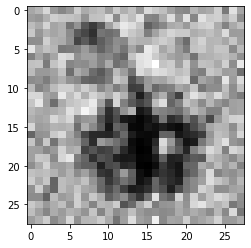

In [12]:
for epoch in range(epochs):
    for i,(x,y) in enumerate(dataloader):
        x, y = x.reshape(x.shape[0],784).to(device), y.to(device)
        noise = ((torch.rand((x.shape[0], 128),dtype=torch.float32) - 0.5) / 0.5).to(device)
        fake_x = model_g(noise)#.reshape(batch_size,1,28,28)
        fake_y = torch.ones((x.shape[0],1),dtype=torch.float32).to(device)
        pred_y = model_d(x)
        pred_fake = model_d(fake_x.detach())
        loss = -1*torch.mean(torch.log(1-pred_fake) + torch.log(pred_y))
        
#         loss = criterion(pred_y,y)
#         loss_fake = criterion(pred_fake,fake_y)
#         loss_total = (loss+loss_fake)/2
        loss.backward(retain_graph=True)
        optim_d.step()
        optim_d.zero_grad()
        if i%500==0:
            print(f'discriminator epoch: {epoch}, step: {i}/{n_step}, loss: {loss:.3f}')

#         noise = ((torch.rand((x.shape[0], 128),dtype=torch.float32) - 0.5) / 0.5).to(device)
#         fake_x = model_g(noise)#.reshape(batch_size,1,28,28)

        pred_fake_new = model_d(fake_x)
        loss_g = -1*torch.mean(torch.log(pred_fake_new))
#         fake_y = torch.zeros((x.shape[0],1),dtype=torch.float32).to(device)
#         loss1 = criterion(pred_fake_grad, fake_y)
#         loss1.backward()
        loss_g.backward()
        optim_g.step()
        optim_g.zero_grad()
        if i%500==0:
            print(f'generator epoch: {epoch}, step: {i}/{n_step}, loss: {loss_g:.3f}')

    with torch.no_grad():
        noise = ((torch.rand((1, 128),dtype=torch.float32) - 0.5) / 0.5).to(device)
        img = model_g(noise)
        img.shape
        img = img.reshape((28,28))
        img = img.to('cpu').detach().numpy()
        plt.imshow(img,cmap="Greys")
        plt.savefig("Generator_epoch_{}.png".format(epoch))


tensor([[0.6429]], device='cuda:0', grad_fn=<SigmoidBackward0>)


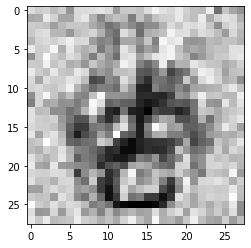

In [13]:
# noise = ((torch.rand((1, 128),dtype=torch.float32) - 0.5) / 0.5).to(device)
# print(noise)
# img = (img+1)/2*255
model_test=generator().to(device)
noise = ((torch.rand((1, 128),dtype=torch.float32) - 0.5) / 0.5).to(device)
img = model_g(noise)
print(model_d(img))
img = img.reshape((28,28))
img = img.to('cpu').detach().numpy()
plt.imshow(img,cmap="Greys")